Импорт библиотек

In [114]:
import pandas as pd
import numpy as np
import networkx as nx

Чтение датафрейма с данными об организации

In [115]:
data = pd.read_csv('markup_18.01.2023.csv')

In [116]:
data.head()

,id,Signatory,Organization,Task1.task_text,Date_sig,Title,Task1.task_responsibles_people,Task1.task_responsibles_groups,Task1.task_deadline,Task2.task_text,...,responsibles_people_Task4.,responsibles_people_Task5.,responsibles_people_Task6.,responsibles_people_Task7.,responsibles_people_Task8.,responsibles_people_Task9.,responsibles_people_respon,Nasmes_global_supervisor,Names_global_supervisor,Posts_global_supervisors
0,0,и.о. генерального директора Сердитый А.И.,"ООО ""Мегасофт""",Закупить книги. Срок завершения: 19 апр 15.,11.4.2013,Приказ,Ответственность за исполнение распоряжения воз...,Административно-хозяйственный отдел,"['19 апр 15', 1429383600.0]",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,['Кравцову И.Е.'],['специалиста первой категории']
1,1,и.о. генерального директора Сердитый А.И.,"ООО ""Мегасофт""",Провести анализ поставщиков для замены вышедше...,3.6.2013,Приказ,Ответственность за исполнение распоряжения воз...,Служба ИТ,"['24 октября 12', 1351015200.0]",Выполнить ремонт кабеля сети передачи данных м...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Кима Юрия Ивановича', 'Сергеева Андрея', 'Ко...","['специалиста третьей категории', 'системного ..."
2,2,генеральный директор Созонов С.В.,"ООО ""Мегасофт""",Провести рефакторинг программного обеспечения ...,8.10.2014,Приказ,Контроль над исполнением распоряжения оставить...,Отдел разработки систем,"['24.12.20', 1608750000.0]",Провести рефакторинг программного обеспечения ...,...,технического писателя,специалистом третьей категории,специалиста третьей категории,NaN,NaN,NaN,NaN,NaN,"['Абаимовым Симоном', 'Ответственным', 'Абаимо...","['тимлидами проектной команды', 'тимлид проект..."
3,3,и.о. генерального директора Кравцов С.С.,"ООО ""Мегасофт""",Оплатить командировочные расходы.\nОпределить ...,10.12.18,Приказ,Контроль над выполнением настоящего распоряжен...,Бухгалтерия,"['26 июля 2019 г.', 1564081200.0]",Провести аудит персональных данных в информаци...,...,специалиста второй категории,специалиста второй категории,NaN,NaN,NaN,NaN,NaN,NaN,"['Смирнову', 'Смирнову О.А.']","['специалиста третей категории', 'специалиста ..."
4,4,и.о. генерального директора Кравцов С.С.,"ООО ""Мегасофт""",Согласовать смету на выполнение работ компание...,19.03.2016,Приказ,Контроль над выполнением настоящего распоряжен...,Бухгалтерия,"['12 янв 2019 г.', 1547233200.0]",Выделить средства на проведение обучения.\nУст...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"['Ответственным', 'Смирнову О.А.']",['специалиста второй категории']


Замена пустых ячеек на 0

In [117]:
data.fillna(0, inplace = True)

In [118]:
data.replace('None', 0, inplace = True)

In [119]:
data.head()

,id,Signatory,Organization,Task1.task_text,Date_sig,Title,Task1.task_responsibles_people,Task1.task_responsibles_groups,Task1.task_deadline,Task2.task_text,...,responsibles_people_Task4.,responsibles_people_Task5.,responsibles_people_Task6.,responsibles_people_Task7.,responsibles_people_Task8.,responsibles_people_Task9.,responsibles_people_respon,Nasmes_global_supervisor,Names_global_supervisor,Posts_global_supervisors
0,0,и.о. генерального директора Сердитый А.И.,"ООО ""Мегасофт""",Закупить книги. Срок завершения: 19 апр 15.,11.4.2013,Приказ,Ответственность за исполнение распоряжения воз...,Административно-хозяйственный отдел,"['19 апр 15', 1429383600.0]",0,...,0,0,0,0,0,0,0,0.0,['Кравцову И.Е.'],['специалиста первой категории']
1,1,и.о. генерального директора Сердитый А.И.,"ООО ""Мегасофт""",Провести анализ поставщиков для замены вышедше...,3.6.2013,Приказ,Ответственность за исполнение распоряжения воз...,Служба ИТ,"['24 октября 12', 1351015200.0]",Выполнить ремонт кабеля сети передачи данных м...,...,0,0,0,0,0,0,0,0.0,"['Кима Юрия Ивановича', 'Сергеева Андрея', 'Ко...","['специалиста третьей категории', 'системного ..."
2,2,генеральный директор Созонов С.В.,"ООО ""Мегасофт""",Провести рефакторинг программного обеспечения ...,8.10.2014,Приказ,Контроль над исполнением распоряжения оставить...,Отдел разработки систем,"['24.12.20', 1608750000.0]",Провести рефакторинг программного обеспечения ...,...,технического писателя,специалистом третьей категории,специалиста третьей категории,0,0,0,0,0.0,"['Абаимовым Симоном', 'Ответственным', 'Абаимо...","['тимлидами проектной команды', 'тимлид проект..."
3,3,и.о. генерального директора Кравцов С.С.,"ООО ""Мегасофт""",Оплатить командировочные расходы.\nОпределить ...,10.12.18,Приказ,Контроль над выполнением настоящего распоряжен...,Бухгалтерия,"['26 июля 2019 г.', 1564081200.0]",Провести аудит персональных данных в информаци...,...,специалиста второй категории,специалиста второй категории,0,0,0,0,0,0.0,"['Смирнову', 'Смирнову О.А.']","['специалиста третей категории', 'специалиста ..."
4,4,и.о. генерального директора Кравцов С.С.,"ООО ""Мегасофт""",Согласовать смету на выполнение работ компание...,19.03.2016,Приказ,Контроль над выполнением настоящего распоряжен...,Бухгалтерия,"['12 янв 2019 г.', 1547233200.0]",Выделить средства на проведение обучения.\nУст...,...,0,0,0,0,0,0,0,0.0,"['Ответственным', 'Смирнову О.А.']",['специалиста второй категории']


In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 67 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              10000 non-null  int64  
 1   Signatory                       10000 non-null  object 
 2   Organization                    10000 non-null  object 
 3   Task1.task_text                 10000 non-null  object 
 4   Date_sig                        10000 non-null  object 
 5   Title                           10000 non-null  object 
 6   Task1.task_responsibles_people  10000 non-null  object 
 7   Task1.task_responsibles_groups  10000 non-null  object 
 8   Task1.task_deadline             10000 non-null  object 
 9   Task2.task_text                 10000 non-null  object 
 10  Task2.task_responsibles_people  10000 non-null  object 
 11  Task2.task_responsibles_groups  10000 non-null  object 
 12  Task2.task_deadline             1

In [121]:
#Проверка на дублирование строк
data.duplicated().sum()

0

In [122]:
data['Organization'].value_counts()

ООО "Мегасофт"    10000
Name: Organization, dtype: int64

In [123]:
data['Signatory'].value_counts()

и.о. генерального директора Сердитый А.И.    3385
генеральный директор Созонов С.В.            3359
и.о. генерального директора Кравцов С.С.     3256
Name: Signatory, dtype: int64

In [124]:
data['Title'].value_counts()

Приказ    10000
Name: Title, dtype: int64

In [125]:
data['Name_signatory'].value_counts()

СЕРДИТЫЙ А И    3385
СОЗОНОВ С В     3359
КРАВЦОВ С С     3256
Name: Name_signatory, dtype: int64

In [126]:
data['Position_of_signatory'].value_counts()

и о  генерального директора      6641
генеральный директор             3359
Name: Position_of_signatory, dtype: int64

In [127]:
data['Task1.task_responsibles_groups'].value_counts()

Бухгалтерия                            2018
Служба ИТ                              2008
Административно-хозяйственный отдел    2000
Отдел разработки систем                1994
Отдел тестирования                      519
Отдел проектирования                    507
Отдел эксплуатации                      484
Отдел архитектуры                       470
Name: Task1.task_responsibles_groups, dtype: int64

In [128]:
data['Task1.task_responsibles_people'].value_counts()

Контроль над выполнением настоящего распоряжения оставляю за собой                                                                         1030
Обеспечение выполнения возложить на специалиста первой категории административно-хозяйственного отдела Кравцову И.Е.                         72
Контроль над выполнением приказа возложить на главного бухгалтера Семенову М.С.                                                              60
За контроль и выполнение назначить ответственным специалиста второй категории административно-хозяйственного отдела Поспелову Н.А.           59
Ответственным за исполнение настоящего приказа назначить специалиста первой категории бухгалтерии Миронову Т.П.                              58
                                                                                                                                           ... 
Контроль над исполнением распоряжения оставить за специалистом первой категории отдела архитектуры Мироновым К.А.                       

In [129]:
data['Global_supervisor'].value_counts()

['Контроль над выполнением настоящего распоряжения оставляю за собой']                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                  

In [130]:
print(data['executor_Task1.'].value_counts())

0                     2185
Александрова А.С.      417
Кравцову И.Е.          411
Семенову М.С.          403
Сергееву               398
                      ... 
Ведерниковым И.С.        9
Абатуровым Борисом       6
Абаковым Алексеем        4
Абакумовым Глебом        3
Мироновым К.А.           2
Name: executor_Task1., Length: 69, dtype: int64


In [131]:
data['responsibles_people_Task1.'].value_counts()

специалиста первой категории                    2011
специалиста второй категории                    1571
0                                               1405
специалиста третьей категории                    841
специалиста третей категории                     417
главного бухгалтера                              403
руководителя Административно-хозяйственного      379
специалистом первой категории                    255
специалистом второй категории                    209
руководителя Службы ИТ                           205
технического писателя                            202
мастера по ремонту компьютеров                   190
администратора баз данных                        167
администратора баз                               162
системного администратора                        157
руководителя отдела разработки                   156
тимлид проектной команды                         146
архитектора программного обеспечения             123
специалистом третьей категории                

In [132]:
data['Names_global_supervisor'].value_counts()

[]                                                                                                                                              308
['Александрова А.С.']                                                                                                                            68
['Смирнову О.А.']                                                                                                                                64
['Семенову М.С.']                                                                                                                                63
['Миронову Т.П.']                                                                                                                                59
                                                                                                                                               ... 
['Сергеева Андрея', 'Ответственным', 'Абакулова Петра', 'Контроль', 'Ответственным', 'Никитину Ирину Петровну', 

In [133]:
data['Posts_global_supervisors'].value_counts()

['специалиста первой категории']                                                                                                                                                                                                 307
['специалиста второй категории']                                                                                                                                                                                                 246
[]                                                                                                                                                                                                                               175
['специалиста третьей категории']                                                                                                                                                                                                115
['специалиста первой категории', 'специалиста первой категории']                    

In [134]:
data['responsibles_people_respon'].value_counts()

0                                              9087
специалиста второй категории                    212
специалиста первой категории                    195
специалиста третьей категории                   108
руководителя отдела                              61
главного бухгалтера                              57
руководителя Административно-хозяйственного      47
специалиста третей категории                     43
специалистом первой категории                    34
администратора вычислительной                    24
мастера по ремонту компьютеров                   23
специалистом второй категории                    21
тимлид проектной команды                         18
специалистом третьей категории                   16
руководителя Службы ИТ                           14
программиста                                     12
архитектора программного обеспечения             12
администратором вычислительной                    5
мастером по ремонту компьютеров                   5
специалистом

Инициирование направленного графа структуры компании

In [135]:
G_structure = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [136]:
G_structure.clear()

In [137]:
list(G_structure)

[]

Создание связей между компанией и отделами

In [139]:
departments = []
for ind in range(len(data['Task1.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task1.task_responsibles_groups'][ind]):
        continue
    elif data['Task1.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task1.task_responsibles_groups'][ind])
    departments.append(data['Task1.task_responsibles_groups'][ind])

In [140]:
for ind in range(len(data['Task2.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task2.task_responsibles_groups'][ind]):
        continue
    elif data['Task2.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task2.task_responsibles_groups'][ind])
    departments.append(data['Task2.task_responsibles_groups'][ind])

In [141]:
for ind in range(len(data['Task3.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task3.task_responsibles_groups'][ind]):
        continue
    elif data['Task3.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task3.task_responsibles_groups'][ind])
    departments.append(data['Task3.task_responsibles_groups'][ind])

In [142]:
for ind in range(len(data['Task4.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task4.task_responsibles_groups'][ind]):
        continue
    elif data['Task4.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task4.task_responsibles_groups'][ind])
    departments.append(data['Task4.task_responsibles_groups'][ind])

In [143]:
for ind in range(len(data['Task5.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task5.task_responsibles_groups'][ind]):
        continue
    elif data['Task5.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task5.task_responsibles_groups'][ind])
    departments.append(data['Task5.task_responsibles_groups'][ind])

In [144]:
for ind in range(len(data['Task6.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task6.task_responsibles_groups'][ind]):
        continue
    elif data['Task6.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task6.task_responsibles_groups'][ind])
    departments.append(data['Task6.task_responsibles_groups'][ind])

In [145]:
for ind in range(len(data['Task7.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task7.task_responsibles_groups'][ind]):
        continue
    elif data['Task7.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task7.task_responsibles_groups'][ind])
    departments.append(data['Task7.task_responsibles_groups'][ind])

In [146]:
for ind in range(len(data['Task8.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task8.task_responsibles_groups'][ind]):
        continue
    elif data['Task8.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task8.task_responsibles_groups'][ind])
    departments.append(data['Task8.task_responsibles_groups'][ind])

In [147]:
for ind in range(len(data['Task9.task_responsibles_groups'])):
    if G_structure.has_edge(data['Organization'][ind], data['Task9.task_responsibles_groups'][ind]):
        continue
    elif data['Task9.task_responsibles_groups'][ind] == 0:
        continue
    elif data['Organization'][ind] == 0:
        continue             
    G_structure.add_edge(data['Organization'][ind], data['Task9.task_responsibles_groups'][ind])
    departments.append(data['Task9.task_responsibles_groups'][ind])

Кол-во узлов в графе

In [148]:
G_structure.order()

9

Кол-во соседних узлов узла ООО "Мегасофт"

In [149]:
G_structure.degree['ООО "Мегасофт"']

8

Кол-во исходящих узлов (отделов) из узла ООО "Мегасофт"

In [150]:
G_structure.out_degree['ООО "Мегасофт"']

8

In [151]:
list(G_structure['ООО "Мегасофт"'])

['Административно-хозяйственный отдел',
 'Служба ИТ',
 'Отдел разработки систем',
 'Бухгалтерия',
 'Отдел проектирования',
 'Отдел архитектуры',
 'Отдел эксплуатации',
 'Отдел тестирования']

Визуализация графа G_structure

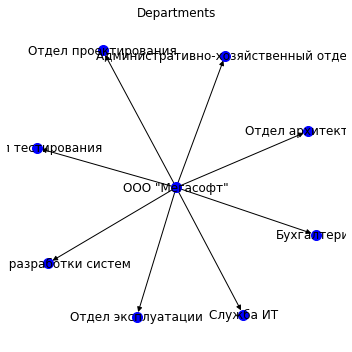

In [152]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))

options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}

plt.title("Departments")
pos=nx.spring_layout(G_structure)
nx.draw_networkx(G_structure, pos=pos, arrows=True, **options)

plt.tight_layout()
plt.axis('off') 
plt.show()

Инициирование направленного графа персонала компании с привязкой к отделам

In [153]:
G_personal = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [154]:
G_personal.clear()

In [155]:
list(G_personal)

[]

In [156]:
executors = []
for ind in range(len(data['executor_Task1.'])):
    if G_personal.has_edge(data['Task1.task_responsibles_groups'][ind], data['executor_Task1.'][ind]):
        continue
    elif data['Task1.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task1.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task1.task_responsibles_groups'][ind], data['executor_Task1.'][ind])
    executors.append(data['executor_Task1.'][ind])

In [157]:
for ind in range(len(data['executor_Task2.'])):
    if G_personal.has_edge(data['Task2.task_responsibles_groups'][ind], data['executor_Task2.'][ind]):
        continue
    elif data['Task2.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task2.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task2.task_responsibles_groups'][ind], data['executor_Task2.'][ind])
    executors.append(data['executor_Task2.'][ind])

In [158]:
for ind in range(len(data['executor_Task3.'])):
    if G_personal.has_edge(data['Task3.task_responsibles_groups'][ind], data['executor_Task3.'][ind]):
        continue
    elif data['Task3.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task3.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task3.task_responsibles_groups'][ind], data['executor_Task3.'][ind])
    executors.append(data['executor_Task3.'][ind])

In [159]:
for ind in range(len(data['executor_Task4.'])):
    if G_personal.has_edge(data['Task4.task_responsibles_groups'][ind], data['executor_Task4.'][ind]):
        continue
    elif data['Task4.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task4.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task4.task_responsibles_groups'][ind], data['executor_Task4.'][ind])
    executors.append(data['executor_Task4.'][ind])

In [160]:
for ind in range(len(data['executor_Task5.'])):
    if G_personal.has_edge(data['Task5.task_responsibles_groups'][ind], data['executor_Task5.'][ind]):
        continue
    elif data['Task5.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task5.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task5.task_responsibles_groups'][ind], data['executor_Task5.'][ind])
    executors.append(data['executor_Task5.'][ind])

In [161]:
for ind in range(len(data['executor_Task6.'])):
    if G_personal.has_edge(data['Task6.task_responsibles_groups'][ind], data['executor_Task6.'][ind]):
        continue
    elif data['Task6.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task6.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task6.task_responsibles_groups'][ind], data['executor_Task6.'][ind])
    executors.append(data['executor_Task6.'][ind])

In [162]:
for ind in range(len(data['executor_Task7.'])):
    if G_personal.has_edge(data['Task7.task_responsibles_groups'][ind], data['executor_Task7.'][ind]):
        continue
    elif data['Task7.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task7.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task7.task_responsibles_groups'][ind], data['executor_Task7.'][ind])
    executors.append(data['executor_Task7.'][ind])

In [163]:
for ind in range(len(data['executor_Task8.'])):
    if G_personal.has_edge(data['Task8.task_responsibles_groups'][ind], data['executor_Task8.'][ind]):
        continue
    elif data['Task8.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task8.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task8.task_responsibles_groups'][ind], data['executor_Task8.'][ind])
    executors.append(data['executor_Task8.'][ind])

In [164]:
for ind in range(len(data['executor_Task9.'])):
    if G_personal.has_edge(data['Task9.task_responsibles_groups'][ind], data['executor_Task9.'][ind]):
        continue
    elif data['Task9.task_responsibles_groups'][ind] == 0:
        continue
    elif data['executor_Task9.'][ind] == 0:
        continue 
    G_personal.add_edge(data['Task9.task_responsibles_groups'][ind], data['executor_Task9.'][ind])
    executors.append(data['executor_Task9.'][ind])

Визуализируем граф персонала

In [165]:
left_nodes = departments.copy()

In [166]:
right_nodes = []
for d in range(len(departments)):
    for p in range(len(list(G_personal[departments[d]]))):
        right_nodes.append((list(G_personal[departments[d]])[p]))

In [167]:
list(G_personal[departments[0]])

['Кравцову И.Е.', 'С.С.Галкина', 'Сергееву', 'Поспелову']

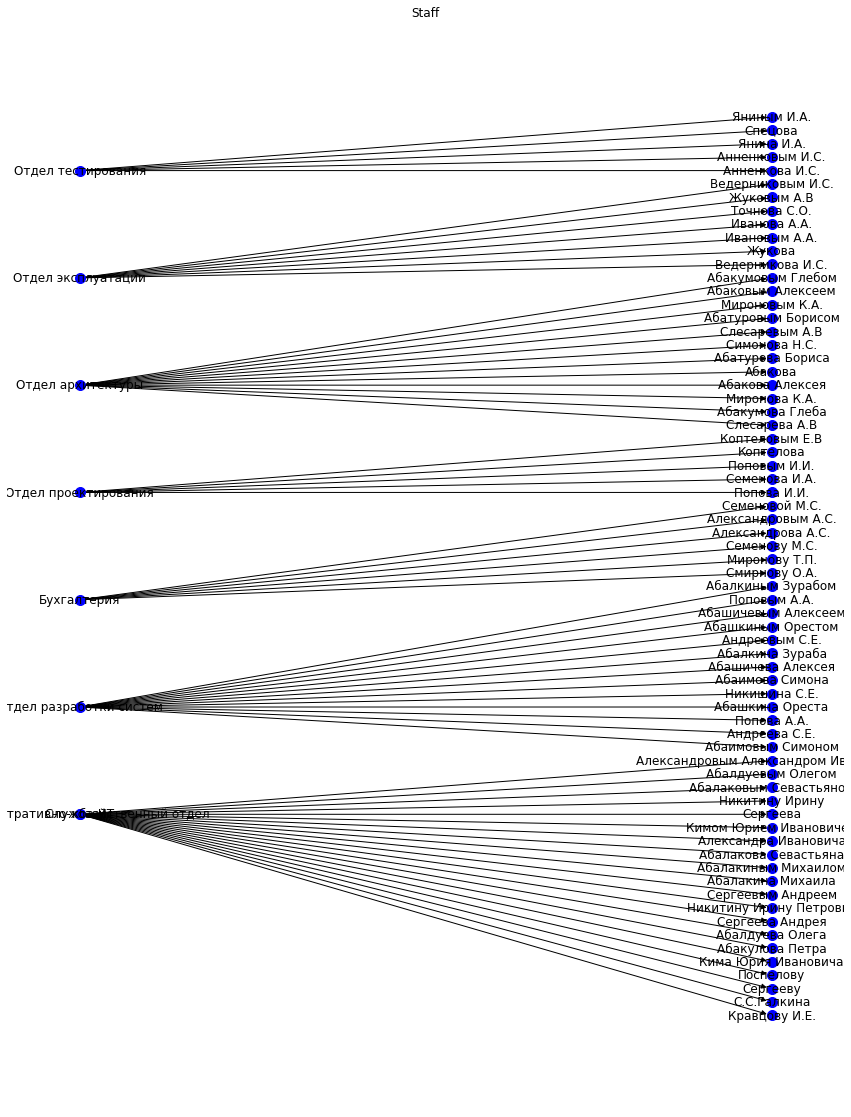

In [168]:

fig = plt.figure(figsize=(15, 20))

plt.title("Staff")

pos = {left_nodes[0]: (0, 15)}
pos.update({n: (0, i * 8 + 15) for i, n in enumerate(left_nodes[1:])})
pos.update({n: (1, i) for i, n in enumerate(right_nodes)})

options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}

nx.draw(G_personal, pos=pos, arrows=True,**options)
plt.axis('off') 
plt.show()

Инициирование направленного графа должностей с привязкой к персоналу

In [169]:
G_position = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [170]:
G_position.clear()

In [171]:
list(G_position)

[]

In [172]:
positions = []
for ind in range(len(data['responsibles_people_Task1.'])):
    if G_position.has_edge(data['executor_Task1.'][ind], data['responsibles_people_Task1.'][ind]):
        continue
    elif data['responsibles_people_Task1.'][ind] == 0:
        continue
    elif data['executor_Task1.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task1.'][ind], data['responsibles_people_Task1.'][ind])
    positions.append(data['responsibles_people_Task1.'][ind])

In [173]:
for ind in range(len(data['responsibles_people_Task2.'])):
    if G_position.has_edge(data['executor_Task2.'][ind], data['responsibles_people_Task2.'][ind]):
        continue
    elif data['responsibles_people_Task2.'][ind] == 0:
        continue
    elif data['executor_Task2.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task2.'][ind], data['responsibles_people_Task2.'][ind])
    positions.append(data['responsibles_people_Task2.'][ind])

In [174]:
for ind in range(len(data['responsibles_people_Task3.'])):
    if G_position.has_edge(data['executor_Task3.'][ind], data['responsibles_people_Task3.'][ind]):
        continue
    elif data['responsibles_people_Task3.'][ind] == 0:
        continue
    elif data['executor_Task3.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task3.'][ind], data['responsibles_people_Task3.'][ind])
    positions.append(data['responsibles_people_Task3.'][ind])

In [175]:
for ind in range(len(data['responsibles_people_Task4.'])):
    if G_position.has_edge(data['executor_Task4.'][ind], data['responsibles_people_Task4.'][ind]):
        continue
    elif data['responsibles_people_Task4.'][ind] == 0:
        continue
    elif data['executor_Task4.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task4.'][ind], data['responsibles_people_Task4.'][ind])
    positions.append(data['responsibles_people_Task4.'][ind])

In [176]:
for ind in range(len(data['responsibles_people_Task5.'])):
    if G_position.has_edge(data['executor_Task5.'][ind], data['responsibles_people_Task5.'][ind]):
        continue
    elif data['responsibles_people_Task5.'][ind] == 0:
        continue
    elif data['executor_Task5.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task5.'][ind], data['responsibles_people_Task5.'][ind])
    positions.append(data['responsibles_people_Task5.'][ind])

In [177]:
for ind in range(len(data['responsibles_people_Task6.'])):
    if G_position.has_edge(data['executor_Task6.'][ind], data['responsibles_people_Task6.'][ind]):
        continue
    elif data['responsibles_people_Task6.'][ind] == 0:
        continue
    elif data['executor_Task6.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task6.'][ind], data['responsibles_people_Task6.'][ind])
    positions.append(data['responsibles_people_Task6.'][ind])

In [178]:
for ind in range(len(data['responsibles_people_Task7.'])):
    if G_position.has_edge(data['executor_Task7.'][ind], data['responsibles_people_Task7.'][ind]):
        continue
    elif data['responsibles_people_Task7.'][ind] == 0:
        continue
    elif data['executor_Task7.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task7.'][ind], data['responsibles_people_Task7.'][ind])
    positions.append(data['responsibles_people_Task7.'][ind])

In [179]:
for ind in range(len(data['responsibles_people_Task8.'])):
    if G_position.has_edge(data['executor_Task8.'][ind], data['responsibles_people_Task8.'][ind]):
        continue
    elif data['responsibles_people_Task8.'][ind] == 0:
        continue
    elif data['executor_Task8.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task8.'][ind], data['responsibles_people_Task8.'][ind])
    positions.append(data['responsibles_people_Task8.'][ind])

In [180]:
for ind in range(len(data['responsibles_people_Task9.'])):
    if G_position.has_edge(data['executor_Task9.'][ind], data['responsibles_people_Task9.'][ind]):
        continue
    elif data['responsibles_people_Task9.'][ind] == 0:
        continue
    elif data['executor_Task9.'][ind] == 0:
        continue 
    G_position.add_edge(data['executor_Task9.'][ind], data['responsibles_people_Task9.'][ind])
    positions.append(data['responsibles_people_Task9.'][ind])

Визуализируем граф должностей с привязкой к персоналу

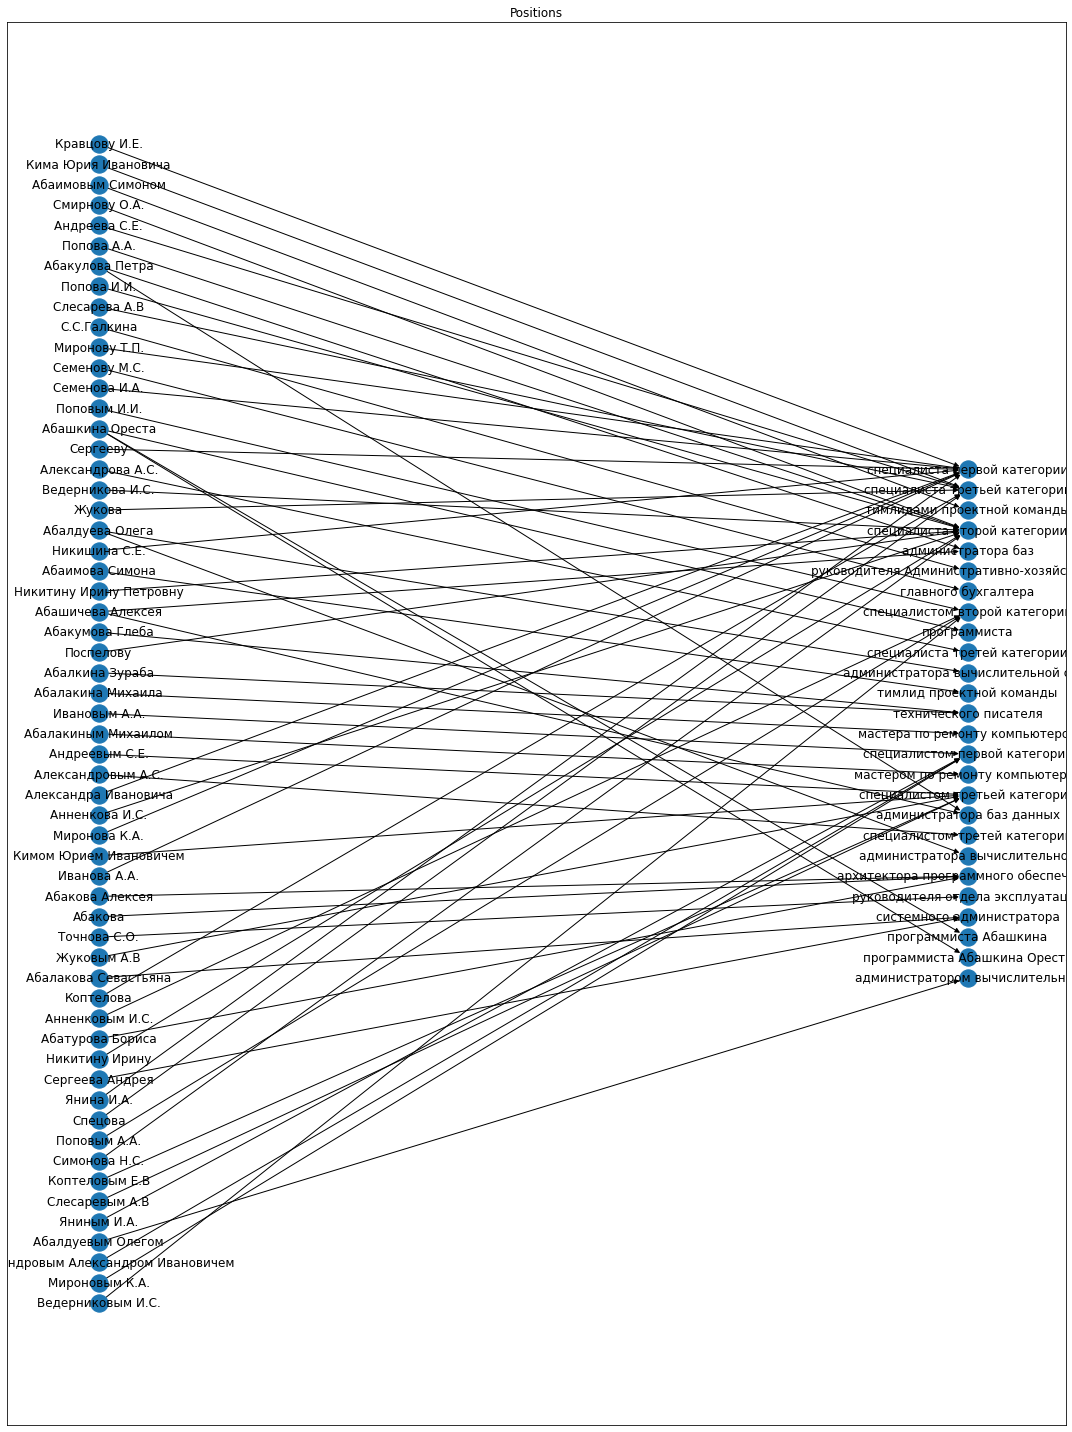

In [181]:
import matplotlib.pyplot as plt

for layer, nodes in enumerate(nx.topological_generations(G_position)):
    # `multipartite_layout` expects the layer as a node attribute, so add the
    # numeric layer value as a node attribute
    for node in nodes:
       G_position.nodes[node]["layer"] = layer

# Compute the multipartite_layout using the "layer" node attribute
pos = nx.multipartite_layout(G_position, subset_key="layer")

fig, ax = plt.subplots(1, 1, figsize = (15, 20))
nx.draw_networkx(G_position, pos=pos, ax=ax)
ax.set_title("Positions")
fig.tight_layout()
plt.show()

Из графа делаем выводы:
1) Однозначно определены должности следующих сотрудников:
Абакулова Петра
Абашкина Ореста
Абалдуева Олега
Абашичева Алексея
2) Некоторые должности содержат имена

Добавим направленный граф с задачами

In [182]:
G_tasks = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [204]:
G_tasks.clear()

In [205]:
list(G_tasks)

[]

In [183]:
tasks = []
for ind in range(len(data['Task1.task_text'])):
    if G_tasks.has_edge(data['executor_Task1.'][ind], data['Task1.task_text'][ind]):
        continue
    elif data['executor_Task1.'][ind] == 0:
        continue
    elif data['Task1.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task1.'][ind], data['Task1.task_text'][ind])
    tasks.append(data['Task1.task_text'][ind])

In [184]:
for ind in range(len(data['Task2.task_text'])):
    if G_tasks.has_edge(data['executor_Task2.'][ind], data['Task2.task_text'][ind]):
        continue
    elif data['executor_Task2.'][ind] == 0:
        continue
    elif data['Task2.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task2.'][ind], data['Task2.task_text'][ind])
    tasks.append(data['Task2.task_text'][ind])

In [185]:
for ind in range(len(data['Task3.task_text'])):
    if G_tasks.has_edge(data['executor_Task3.'][ind], data['Task3.task_text'][ind]):
        continue
    elif data['executor_Task3.'][ind] == 0:
        continue
    elif data['Task3.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task3.'][ind], data['Task3.task_text'][ind])
    tasks.append(data['Task3.task_text'][ind])

In [186]:
for ind in range(len(data['Task4.task_text'])):
    if G_tasks.has_edge(data['executor_Task4.'][ind], data['Task4.task_text'][ind]):
        continue
    elif data['executor_Task4.'][ind] == 0:
        continue
    elif data['Task4.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task4.'][ind], data['Task4.task_text'][ind])
    tasks.append(data['Task4.task_text'][ind])

In [187]:
for ind in range(len(data['Task5.task_text'])):
    if G_tasks.has_edge(data['executor_Task5.'][ind], data['Task5.task_text'][ind]):
        continue
    elif data['executor_Task5.'][ind] == 0:
        continue
    elif data['Task5.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task5.'][ind], data['Task5.task_text'][ind])
    tasks.append(data['Task5.task_text'][ind])

In [188]:
for ind in range(len(data['Task6.task_text'])):
    if G_tasks.has_edge(data['executor_Task6.'][ind], data['Task6.task_text'][ind]):
        continue
    elif data['executor_Task6.'][ind] == 0:
        continue
    elif data['Task6.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task6.'][ind], data['Task6.task_text'][ind])
    tasks.append(data['Task6.task_text'][ind])

In [189]:
for ind in range(len(data['Task7.task_text'])):
    if G_tasks.has_edge(data['executor_Task7.'][ind], data['Task7.task_text'][ind]):
        continue
    elif data['executor_Task7.'][ind] == 0:
        continue
    elif data['Task7.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task7.'][ind], data['Task7.task_text'][ind])
    tasks.append(data['Task7.task_text'][ind])

In [190]:
for ind in range(len(data['Task8.task_text'])):
    if G_tasks.has_edge(data['executor_Task8.'][ind], data['Task8.task_text'][ind]):
        continue
    elif data['executor_Task8.'][ind] == 0:
        continue
    elif data['Task8.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task8.'][ind], data['Task8.task_text'][ind])
    tasks.append(data['Task8.task_text'][ind])

In [191]:
for ind in range(len(data['Task9.task_text'])):
    if G_tasks.has_edge(data['executor_Task9.'][ind], data['Task9.task_text'][ind]):
        continue
    elif data['executor_Task9.'][ind] == 0:
        continue
    elif data['Task9.task_text'][ind] == 0:
        continue 
    G_tasks.add_edge(data['executor_Task9.'][ind], data['Task9.task_text'][ind])
    tasks.append(data['Task9.task_text'][ind])

In [192]:
list(G_tasks)

['Кравцову И.Е.',
 'Закупить книги. Срок завершения: 19 апр 15.',
 'Кима Юрия Ивановича',
 'Провести анализ поставщиков для замены вышедшего из строя оборудования. Срок завершения: 24 октября 12.',
 'Абаимовым Симоном',
 'Провести рефакторинг программного обеспечения для повышения производительности. Срок выполнения поручения: 24.12.20.',
 'Смирнову О.А.',
 'Выполнить сверку расчетов с компаниями-пордядчиками.\nСрок выполнения поручения: 02.01.2016.',
 'Андреева С.Е.',
 'Провести анализ неисправности работы API и обеспечить устранение ошибки. Привести вышеизложенное поручение в исполнение к 16 августа 17.',
 'Попова А.А.',
 'Добавить дополнительных механизм авторизации пользователей в системе.\nПривести вышеизложенное поручение в исполнение к 11.09.15.',
 'Абакулова Петра',
 'Организовать VPN соединение для взаимодействия с подрядчиком. Срок выполнения поручения: 19 сен 12.',
 'Попова И.И.',
 'Сохранить проектную документацию в архиве. Определить срок исполнения задачи вплоть до 22 дек

KeyboardInterrupt: 

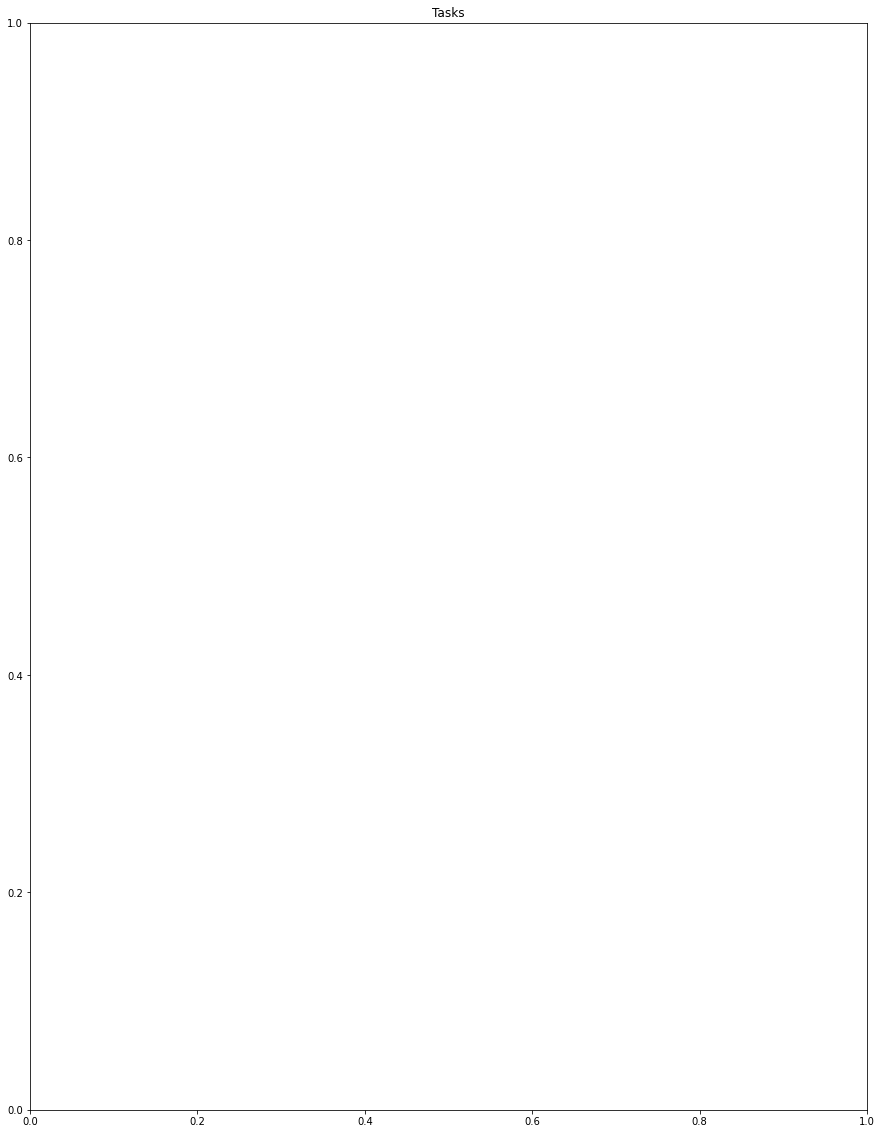

In [102]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15, 20))

options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}

plt.title("Tasks")
pos=nx.spring_layout(G_tasks)
nx.draw(G_tasks, pos=pos, arrows=True, **options)

plt.tight_layout()
plt.axis('off') 
plt.show()

Создаем общий направленный граф компании, котрый включает в себя все предыдущие

In [193]:
G_company = nx.DiGraph()

Очистка графа (при необходимости пересоздания)

In [194]:
G_company.clear()

In [195]:
list(G_company)

[]

In [196]:
G_company = nx.disjoint_union(nx.disjoint_union(G_structure, G_personal), nx.disjoint_union(G_position, G_tasks))

In [197]:
G_company.adj

AdjacencyView({0: {1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}}, 1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {10: {}, 24: {}, 30: {}, 42: {}}, 10: {}, 11: {12: {}, 19: {}, 35: {}, 36: {}, 39: {}, 43: {}, 45: {}, 47: {}, 48: {}, 51: {}, 55: {}, 59: {}, 66: {}, 77: {}, 79: {}, 80: {}}, 12: {}, 13: {14: {}, 17: {}, 18: {}, 29: {}, 37: {}, 38: {}, 40: {}, 44: {}, 49: {}, 64: {}, 70: {}, 71: {}, 73: {}}, 14: {}, 15: {16: {}, 25: {}, 26: {}, 31: {}, 50: {}, 67: {}}, 16: {}, 17: {}, 18: {}, 19: {}, 20: {21: {}, 27: {}, 28: {}, 62: {}, 74: {}}, 21: {}, 22: {23: {}, 41: {}, 54: {}, 57: {}, 58: {}, 65: {}, 72: {}, 75: {}, 76: {}, 81: {}, 83: {}, 84: {}}, 23: {}, 24: {}, 25: {}, 26: {}, 27: {}, 28: {}, 29: {}, 30: {}, 31: {}, 32: {33: {}, 34: {}, 46: {}, 56: {}, 60: {}, 61: {}, 82: {}}, 33: {}, 34: {}, 35: {}, 36: {}, 37: {}, 38: {}, 39: {}, 40: {}, 41: {}, 42: {}, 43: {}, 44: {}, 45: {}, 46: {}, 47: {}, 48: {}, 49: {}, 50: {}, 51: {}, 52: {53: {}, 63: {}, 68: {}, 69: {}

Сохраним созданные графы в файлы, чтобы потом можно было использовать

In [198]:
nx.write_gpickle(G_structure, "Structure.gpickle")
nx.write_gpickle(G_personal, "Personal.gpickle")
nx.write_gpickle(G_position, "Position.gpickle")
nx.write_gpickle(G_tasks, "Tasks.gpickle")
nx.write_gpickle(G_company, "Company.gpickle")

Прочитать граф из файла

In [199]:
G_structure_load = nx.read_gpickle("Structure.gpickle")

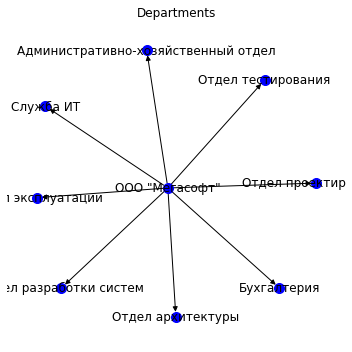

In [200]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(5, 5))

options = {'node_color': 'blue', 'edge_color' : 'black', 'node_size': 50, 'with_labels' : True, 'width': 3, 'node_size' : 100, 'width': 1}

plt.title("Departments")
pos=nx.spring_layout(G_structure_load)
nx.draw_networkx(G_structure_load, pos=pos, arrows=True, **options)

plt.tight_layout()
plt.axis('off') 
plt.show()

In [208]:
print('Количество департаментов: ')
len(list(G_structure['ООО "Мегасофт"']))

Количество департаментов: 


8

In [209]:
print('Названия департаментов: ')
list(G_structure['ООО "Мегасофт"'])

Названия департаментов: 


['Административно-хозяйственный отдел',
 'Служба ИТ',
 'Отдел разработки систем',
 'Бухгалтерия',
 'Отдел проектирования',
 'Отдел архитектуры',
 'Отдел эксплуатации',
 'Отдел тестирования']

In [210]:
print('Количество сотрудников: ')
len(executors)

Количество сотрудников: 


68

In [213]:
print('ФИО: ')
executors

ФИО: 


['Кравцову И.Е.',
 'Кима Юрия Ивановича',
 'Абаимовым Симоном',
 'Смирнову О.А.',
 'Андреева С.Е.',
 'Попова А.А.',
 'Абакулова Петра',
 'Попова И.И.',
 'Слесарева А.В',
 'С.С.Галкина',
 'Миронову Т.П.',
 'Семенову М.С.',
 'Семенова И.А.',
 'Поповым И.И.',
 'Абашкина Ореста',
 'Сергееву',
 'Александрова А.С.',
 'Ведерникова И.С.',
 'Жукова',
 'Абалдуева Олега',
 'Сергеева Андрея',
 'Никишина С.Е.',
 'Абаимова Симона',
 'Никитину Ирину Петровну',
 'Абашичева Алексея',
 'Абакумова Глеба',
 'Поспелову',
 'Сергеевым Андреем',
 'Абалкина Зураба',
 'Абалакина Михаила',
 'Ивановым А.А.',
 'Абалакиным Михаилом',
 'Абалакова Севастьяна',
 'Андреевым С.Е.',
 'Александровым А.С.',
 'Александра Ивановича',
 'Анненкова И.С.',
 'Миронова К.А.',
 'Кимом Юрием Ивановичем',
 'Иванова А.А.',
 'Абакова Алексея',
 'Абакова',
 'Сергеева',
 'Точнова С.О.',
 'Жуковым А.В',
 'Коптелова',
 'Анненковым И.С.',
 'Абашкиным Орестом',
 'Абатурова Бориса',
 'Никитину Ирину',
 'Семеновой М.С.',
 'Янина И.А.',
 'Спецо

In [212]:
print('Количество должностей: ')
len(positions)

Количество должностей: 


63

In [214]:
print('Название должностей: ')
positions

Название должностей: 


['специалиста первой категории',
 'специалиста третьей категории',
 'тимлидами проектной команды',
 'специалиста второй категории',
 'специалиста третьей категории',
 'специалиста второй категории',
 'администратора баз',
 'специалиста второй категории',
 'специалиста третьей категории',
 'руководителя Административно-хозяйственного',
 'специалиста первой категории',
 'главного бухгалтера',
 'специалиста первой категории',
 'специалистом второй категории',
 'программиста',
 'специалиста первой категории',
 'специалиста третей категории',
 'специалиста второй категории',
 'специалиста третьей категории',
 'администратора вычислительной сети',
 'специалиста первой категории',
 'тимлид проектной команды',
 'специалиста второй категории',
 'администратора баз',
 'технического писателя',
 'специалиста второй категории',
 'технического писателя',
 'мастера по ремонту компьютеров',
 'специалистом первой категории',
 'мастером по ремонту компьютеров',
 'специалистом третьей категории',
 'админ

In [215]:
print('Уникальные задачи, поручения: ')
tasks

Уникальные задачи, поручения: 


['Закупить книги. Срок завершения: 19 апр 15.',
 'Провести анализ поставщиков для замены вышедшего из строя оборудования. Срок завершения: 24 октября 12.',
 'Провести рефакторинг программного обеспечения для повышения производительности. Срок выполнения поручения: 24.12.20.',
 'Выполнить сверку расчетов с компаниями-пордядчиками.\nСрок выполнения поручения: 02.01.2016.',
 'Провести анализ неисправности работы API и обеспечить устранение ошибки. Привести вышеизложенное поручение в исполнение к 16 августа 17.',
 'Добавить дополнительных механизм авторизации пользователей в системе.\nПривести вышеизложенное поручение в исполнение к 11.09.15.',
 'Организовать VPN соединение для взаимодействия с подрядчиком. Срок выполнения поручения: 19 сен 12.',
 'Сохранить проектную документацию в архиве. Определить срок исполнения задачи вплоть до 22 дек 18.',
 'Уточнить список сотрудников, имеющих право на бесплатное парковочное место у офиса. Выполнить данное поручение до 28.05.14.',
 'Провести замену

In [33]:
# for ind in range(len(data['Name_signatory'])):
#     if G_company.has_edge(data['Name_signatory'][ind], data['Organization'][ind]):
#         continue
#     elif data['Name_signatory'][ind] == 0:
#         continue
#     elif data['Organization'][ind] == 0:
#         continue             
#     G_company.add_edge(data['Name_signatory'][ind], data['Organization'][ind])

In [34]:
# for ind in range(len(data['Name_signatory'])):
#     if G_company.has_edge(data['Name_signatory'][ind], data['Position_of_signatory'][ind]):
#         continue
#     elif data['Name_signatory'][ind] == 0:
#         continue
#     elif data['Position_of_signatory'][ind] == 0:
#         continue             
#     G_company.add_edge(data['Name_signatory'][ind], data['Position_of_signatory'][ind])